# Refractive Index and Coherence Length

Plot the frequency-dependent refractive index at terahertz and optical frequencies and
use this to determine the frequency-dependent coherence length

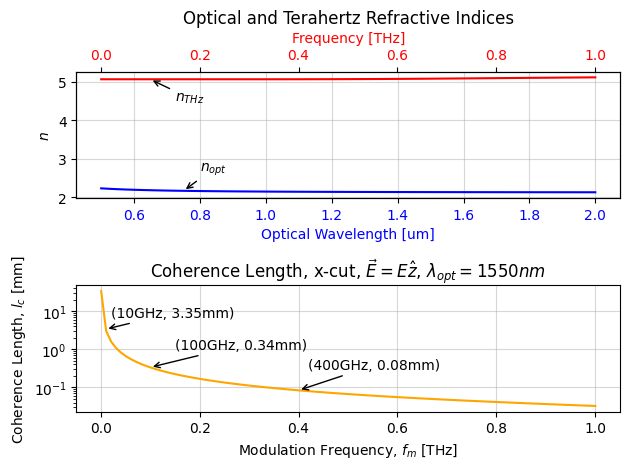

In [1]:
# For relative imports
import os, sys
parent_dir = os.path.abspath('..')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

import numpy as np
import matplotlib.pyplot as plt
import n_opt
import n_thz
from phase_modulation import coherence_length

# Optical wavelength
l_opt = 1.55  # [um]

# Results Plotting
f_m = np.linspace(0.001, 1, 100)
l = np.linspace(0.5, 2.0, 100)

fig, ax = plt.subplots(2, 1)

n1 = [n_opt.n_e(x) for x in l]
ax[0].plot(l, n1, label=r"$n_{opt}$", color="blue")
ax[0].set_xlabel("Optical Wavelength [um]", color="blue")
ax[0].set_ylabel(r"$n$")
ax[0].tick_params(axis="x", labelcolor="blue")
ax[0].annotate(
    r"$n_{opt}$",
    xy=(0.75, n_opt.n_e(0.75)),
    xycoords="data",
    xytext=(0.8, 2.7),
    textcoords="data",
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
)
ax[0].grid(which="major", alpha=0.5)

ax2 = ax[0].twiny()
n2 = np.array([n_thz.n_e(x) for x in f_m])
n_mismatch = n2 - n_opt.n_e(1.55)
ax2.plot(f_m, n2, label=r"$n_{THz}$", color="red")
ax2.set_title(r"Optical and Terahertz Refractive Indices")
ax2.set_xlabel("Frequency [THz]", color="red")
ax2.tick_params(axis="x", labelcolor="red")
ax2.annotate(
    r"$n_{THz}$",
    xy=(0.1, n_thz.n_e(0.1)),
    xycoords="data",
    xytext=(0.15, 4.5),
    textcoords="data",
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
)

coh_len = [coherence_length(f, l_opt) for f in f_m]
l1 = coherence_length(0.01, l_opt)
l2 = coherence_length(0.1, l_opt)
l3 = coherence_length(0.4, l_opt)
coh_len_800nm = [coherence_length(f, 0.8) for f in f_m]
ax[1].plot(f_m, coh_len, color="orange")
ax[1].set_title(
    r"Coherence Length, x-cut, $\vec{E} = E\hat{z}$, " r"$\lambda_{opt}=1550nm$"
)
ax[1].set_ylabel(r"Coherence Length, $l_c$ [mm]")
ax[1].set_xlabel(r"Modulation Frequency, $f_m$ [THz]")
ax[1].set_yscale("log")
ax[1].annotate(
    "(10GHz, {:.2f}mm)".format(l1),
    xy=(0.01, l1),
    xycoords="data",
    xytext=(0.02, 7),
    textcoords="data",
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
)
ax[1].annotate(
    "(100GHz, {:.2f}mm)".format(l2),
    xy=(0.1, l2),
    xycoords="data",
    xytext=(0.15, 1),
    textcoords="data",
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
)
ax[1].annotate(
    "(400GHz, {:.2f}mm)".format(l3),
    xy=(0.4, l3),
    xycoords="data",
    xytext=(0.42, 0.3),
    textcoords="data",
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
)
ax[1].grid(which="major", alpha=0.5)

plt.tight_layout()
plt.show()